<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Leitura-dos-Dados" data-toc-modified-id="Leitura-dos-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Leitura dos Dados</a></span></li><li><span><a href="#EDA:-Explorando-Insights" data-toc-modified-id="EDA:-Explorando-Insights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA: Explorando Insights</a></span><ul class="toc-item"><li><span><a href="#Overview-Geral-da-Base" data-toc-modified-id="Overview-Geral-da-Base-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overview Geral da Base</a></span></li><li><span><a href="#Variáveis-de-Espaço-e-Ambiente" data-toc-modified-id="Variáveis-de-Espaço-e-Ambiente-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variáveis de Espaço e Ambiente</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento referente a análise exploratória de insights relacionada ao dataset [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) retirado da plataforma Kaggle para aprimoramento de skills em Data Science e Machine Learning.

___
**_Descrição e contexto:_**
_Peça a um comprador de casas para descrever a casa dos seus sonhos e ele provavelmente não irá iniciar a descrição com a "altura do teto do porão" ou com a "proximidade com uma ferrovia leste-oeste". Entretanto, o conjunto de dados dessa competição prova que existem influencias na negociação de casas além do número de quartos ou banheiros. Com aproximadamente 80 variáveis explicativas descrevento praticamente todo e qualquer aspecto residencial de casas em Ames, Iowa, essa competição desafia o usuário a prever o preço final de casas._

Paralelamente, este notebook será essencial para a validação de novos desenvolvimentos atrelados ao pacote [pycomp](https://github.com/ThiagoPanini/pycomp), uma biblioteca caseira desenvolvida com o intuito de facilitar todos os passos relacionados a análise de dados, desde a exploração inicial envolvendo plotagens gráficas até o treinamento e aprimoramento de modelos preditivos.

In [1]:
# Bibliotecas do projeto
import pandas as pd
import os
from warnings import filterwarnings
filterwarnings('ignore')

# Variáveis do projeto
DATA_PATH = 'data/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# Leitura dos Dados

Após a importação das principais bibliotecas comuns ao projeto e também da definição de variávies importantes para a leitura dos dados, é possível realizar o primeiro contato com a base de dados disponível para o desenvolvimento da tarefa.

In [2]:
# Lendo dados de treino
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Com a leitura dos dados, é possível consultar a página de [metadados](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) para extrair o significado de cada uma das 80 colunas disponíveis na base:

* **_1stFlrSF_**:	Área total do primeiro andar da moradia
* **_2ndFlrSF_**:	Área total do segundo andar da moradia
* **_3SsnPorch_**:	Área de varande de três temporadas (?)
* **_Alley_**:	Característica da viela que dá acesso a moradia
* **_BedroomAbvGr_**:	Quantidade de camas na moradia (acima do porão)
* **_BldgType_**:	Tipo de habitação
* **_BsmtCond_**:	Classifica condição geral do porão
* **_BsmtExposure_**:	Exposição do porão da moradia
* **_BsmtFinSF1_**:	Área coberta pelo acabamento do tipo 1 (atributo BsmtFinType1)
* **_BsmtFinSF2_**:	Área coberta pelo acabamento do tipo 2 (atributo BsmtFinType2)
* **_BsmtFinType1_**:	Score do acabamento da região relacionada ao porão
* **_BsmtFinType2_**:	Score do acabamento da região relacionada ao porão (se mais de um existir)
* **_BsmtFullBath_**:	Banheiros completos (full) da área relacionada ao porão
* **_BsmtHalfBath_**:	Banheiros incompletos (half) da área relacionada ao porão
* **_BsmtQual_**:	Classifica a moradia quanto ao tamanho do porão
* **_BsmtUnfSF_**:	Área do porão sem acabamento
* **_CentralAir_**:	Define se existe ou não um ar condicionado central (atributo booleano)
* **_Condition1_**:	Proximidade com pontos importantes da cidade
* **_Condition2_**:	Proximidade com pontos importantes da cidade (se houver mais de um)
* **_Electrical_**:	Tipo de sistema elétrico da casa
* **_EnclosedPorch_**:	Área de varanda fechada na moradia
* **_ExterCond_**:	Condição do material externo na data de observação
* **_Exterior1st_**:	Cobertura externa da casa
* **_Exterior2nd_**:	Cobertura externa da casa (se houver mais de uma cobertura)
* **_ExterQual_**:	Qualidade do material utilizado no exterior
* **_Fence_**:	Qualidade do cercado presente na moradia
* **_FireplaceQu_**:	Qualidade das lareiras
* **_Fireplaces_**:	Quantidade de lareiras da moradia
* **_Foundation_**:	Tipo de alicerce utilizado na construção
* **_FullBath_**:	Quantidade de banheiros completos na casa (acima do porão)
* **_Functional_**:	Descreve funcionalidades da casa sob garantia
* **_GarageArea_**:	Área da garagem em metros quadrados
* **_GarageCars_**:	Tamanho da garagem relacionado a quantidade de carros possíveis
* **_GarageCond_**:	Score que define as condições da garagem
* **_GarageFinish_**:	Acabamento interno da garagem
* **_GarageQual_**:	Qualidade da garagem
* **_GarageType_**:	Tipo de garagem da moradia
* **_GarageYrBlt_**:	Ano de construção da garagem
* **_GrLivArea_**:	Área total da sala de estar
* **_HalfBath_**:	Quantidade de banheiros incompletos (half) na casa (acima do porão)
* **_Heating_**:	Tipo de aquecimento da moradia
* **_HeatingQC_**:	Qualidade do aquecimento
* **_HouseStyle_**:	Estilo da habitação
* **_KitchenAbvGr_**:	Quantidade de cozinhas na moradia (acima do porão)
* **_KitchenQual_**:	Qualidade das cozinhas
* **_LandContour_**:	Nivelamento da moradia
* **_LandSlope_**:	Declive da propriedade
* **_LotArea_**:	Área do loteamento
* **_LotConfig_**:	Configuração do loteamento
* **_LotFrontage_**:	Dimensão do perímetro frontal da casa
* **_LotShape_**:	Formato geral da moradia
* **_LowQualFinSF_**:	Área total de acabamentos de baixa qualidade em toda a moradia
* **_MasVnrArea_**:	Área coberta pela alvenaria
* **_MasVnrType_**:	Tipo de alvenaria utilizada
* **_MiscFeature_**:	Algumas features não inclusas nas demais categorias
* **_MiscVal_**:	Valor das features não inclusas em critérios de quantidades
* **_MoSold_**:	Mês no qual a venda da moradia foi efetivada
* **_MSSubClass_**:	Identifica o tipo de moradia da residência
* **_MSZoning_**:	Classifica o imóvel por zona
* **_Neighborhood_**:	Localidade relacionada as fronteiras da cidade
* **_nome_variavel_**:	descricao
* **_OpenPorchSF_**:	Área de varanda aberta na moradia
* **_OverallCond_**:	Score da condição geral da moradia
* **_OverallQual_**:	Score do material e acabamento da moradia
* **_PavedDrive_**:	Atributo que define a pavimentação da rua (dentro da moradia)
* **_PoolArea_**:	Área de piscina presente na moradia
* **_PoolQC_**:	Qualidade da piscina
* **_RoodMatl_**:	Material utilizado na cobertura (telhado)
* **_RoofStyle_**:	Tipo de cobertura da casa (telhado)
* **_SaleCondition_**:	Condições da venda
* **_SaleType_**:	Tipo da venda
* **_ScreenPorch_**:	Área de tela na varanda da moradia
* **_Street_**:	Característica da rua que dá acesso a moradia
* **_TotalBsmtSF_**:	Área total do porão
* **_TotRmsAbvGrd_**:	Quantidade total de quartos na moradia (acima do porão)
* **_Utilities_**:	Serviços de utilidade pública
* **_WoodDeckSF_**:	Área do deck de madeira presente na moradia
* **_YearBuilt_**:	Ano de construção da casa
* **_YearRemodAdd_**:	Ano de remodelação da casa (mesmo que YearBuilt se a casa não foi remodelada)
* **_YrSold_**:	Ano no qual a venda da moradia foi efetivada

# EDA: Explorando Insights

Neste ponto, tem-se um contexto bem definido do objetivo do projeto, além de uma base de dados já lida e transformada em um formato DataFrame do pandas. A partir deste momento, será proposta uma verdadeira varredura nos dados para a aplicação de uma análise descritiva detalhada em prol do levantamento de insights relevantes para o contexto de negócio.

Utilizando o pacote caseiro [pycomp](https://github.com/ThiagoPanini/pycomp), cuja construção foi motivada exatamente para facilitar o trabalho de cientistas de dados nos pilares de insights, prep e modelagem, espera-se, dessa segunda sessão, um entendimento pleno sobre o conjunto de dados disponíveis e uma ideia clara sobre os passos necessários para serem aplicados no prep e na modelagem.

<img src="https://i.imgur.com/WcAaq1P.png" alt="pycomp Logo"></a>

## Overview Geral da Base

Este projeto possui uma particularidade: a presença de um número elevado de variáveis disponíveis para análise. Dessa forma, para que o projeto não fique extremamente extenso a partir da análise individual de cada uma das variáveis, é importante fornecer uma visão geral dos atributos presentes no conjunto de dados com alguns pontos relevantes que podem auxiliar futuras decisões de análise.

Para isso, será utilizada a função `data_overview()` que, por sua vez, executa uma série de análises úteis na base como um todo, retornando, por fim, características relevantes para cada um dos atributos presentes.

In [3]:
# Importando funções e definindo target
from pycomp.viz.insights import *

TARGET = 'SalePrice'

df_overview = data_overview(df=df, corr=True, target=TARGET)
print(f'Visualizando algumas variáveis e seus respectivos dados')
df_overview.head(25)

Visualizando algumas variáveis e seus respectivos dados


,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
0,PoolQC,1453,0.995205,object,3,NaN
1,MiscFeature,1406,0.963014,object,4,NaN
2,Alley,1369,0.937671,object,2,NaN
3,Fence,1179,0.807534,object,4,NaN
4,FireplaceQu,690,0.472603,object,5,NaN
5,LotFrontage,259,0.177397,float64,0,0.351799
6,GarageYrBlt,81,0.055479,float64,0,0.486362
7,GarageCond,81,0.055479,object,5,NaN
8,GarageType,81,0.055479,object,6,NaN
9,GarageFinish,81,0.055479,object,3,NaN


Ao executar a função `data_overview()`, é possível retornar, para cada um dos atributos, as seguintes informações:

* **_qtd_null_**: quantidade de dados nulos presentes na respectiva coluna;
* **_pct_null_**: percentual de dados nulos da respectiva coluna;
* **_dtype_**: tipo primitivo relacionado a coluna;
* **_qtd_cat_**: quantidade de categorias distintas (no caso de variáveis categóricas);
* **_target_pearson_corr_**: correlação com a variável target.

Dessa forma, é possível perceber algumas particularidades interessantes:

* A variável `PoolQC` possui 99.5% de entradas nulas na base. Na prática, essa variável indica a qualidade da piscina presente no imóvel e, dados nulos provavalmente indicam que o imóvel não possui piscina;
* As variáveis `MiscFeature`, `Alley` e `Fence` também possuem uma alta quantidade de dados nulos. Na prática, assim como em `PoolQC`, essas variáveis descrevem características específicas e particulares dos imóveis, o que, de fato, pode não estar presente na grande maioria das casas;
* Observando a lista ordenada por quantidade de dados nulos, é possível notar que as variáveis `GarageYrBlt`, `MasVnrArea` e `Fireplaces` possuem altas correlações com a variável target (`SalePrice`) e este pode ser um bom fator investigativo no futuro

In [4]:
# Principais variáveis por quantidade de entradas categóricas
df_overview.sort_values(by='qtd_cat', ascending=False).head()

,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
53,Neighborhood,0,0.0,object,25,NaN
77,Exterior2nd,0,0.0,object,16,NaN
78,Exterior1st,0,0.0,object,15,NaN
52,Condition1,0,0.0,object,9,NaN
42,SaleType,0,0.0,object,9,NaN


In [5]:
# Principais variáveis por correlação positiva
df_overview.sort_values(by='target_pearson_corr', ascending=False).head()

,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
80,SalePrice,0,0.0,int64,0,1.000000
48,OverallQual,0,0.0,int64,0,0.790982
30,GrLivArea,0,0.0,int64,0,0.708624
29,GarageCars,0,0.0,int64,0,0.640409
31,GarageArea,0,0.0,int64,0,0.623431


Os dois conjuntos acima mostram as principais variáveis por:
1. Quantidade de entradas categóricas
2. Maior correlação positiva com a variável target

Estes dois cenários permitem analisar com maior profundido os possíveis passos a serem consideradas na etapa de Prep da base de dados. Por exemplo, é preciso considerar que a variável `Neighborhood`, ao receber o procedimento de `encoding`, irá gerar 26 colunas adicionais na base final.

## Variáveis de Espaço e Ambiente

Após uma análise inicial nas variáveis presentes na base como um todo, é importante definir os próximos passos de exploração dos dados frente a grande quantidade de features presentes. Dessa forma, a estratégia adotada é a categorização das colunas da base em três diferentes contextos:

* **_Variáveis de Espaço e Ambiente_**: análises relacionadas a variáveis que descrevem situações do imóvel em termos de espaço e ambiente;
* **_Variáveis de Construção_**: insights retirados de variáveis que indicam características de construção do imóvel;
* **_Variáveis de Localização_**: análises gráficas em variáveis que trazem informações relacionadas a localização do imóvel.

Nesta sessão, serão analisadas as variáveis relacionadas a "Espaço e Ambiente", criando conjuntos específicos de features e realizando plotagens gráficas de modo a verificar características estatísticas das features e suas respectivas relações com a variável target.

In [6]:
from math import ceil
from pycomp.viz.formatador import *

def plot_multiple_distplots(df, col_list, n_cols=3, kind='dist', **kwargs):
    """
    Função responsável pela plotagem de análise contínua para múltiplas variáveis
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col_list: lista de colunas a serem utilizadas na análise [type: list]
    :param n_cols: número de colunas configuradas na figura [type: int, default=3]
    :param kind: tipo de plotagem de distribuição [type: string, default='dist']
        *opções: ['dist', 'kde', 'box', 'boxen', 'strip']
    :param **kwargs: parâmetros adicionais da função   
        :arg hue: parâmetro hue para quebra de plotagem do método countplot [type: string, default=None]
        :arg figsize: dimensões da figura de plotagem [type: tuple, default=(8, 8)]
        :arg label_names: labels personalizados para os rótulos [type: dict, default=value_counts().index]
        :arg palette: paleta de cores utilizada na plotagem [type: string, default='rainbow']
        :arg color: cor da linha para distplot e kdeplot [type: string, default='darkslateblue']
        :arg title: título do gráfico [type: string, default=f'{kind}plot para a Variável {col}']
        :arg size_title: tamanho do título [type: int, default=16]
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_countplot.png']
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além de um gráfico de barras summarizado

    Aplicação
    ---------
    plot_distplot(df=df, col='column_name')
    """
    
    # Validando tipo de plotagem
    possible_kinds = ['dist', 'kde', 'box', 'boxen', 'strip']
    if kind not in possible_kinds:
        print(f'Parâmetro kind inválido. Opções possívels: {possible_kinds}')
        return
    
    # Calculando parâmetros da figura de plotagem
    n_rows = ceil(len(col_list) / n_cols)
    figsize = (17, n_rows * 5)
    i, j = 0, 0
    
    # Parâmetros adicionais de plotagem
    hue = kwargs['hue'] if 'hue' in kwargs else None
    hist = kwargs['hist'] if 'hist' in kwargs else True
    kde = kwargs['kde'] if 'kde' in kwargs else True
    rug = kwargs['rug'] if 'rug' in kwargs else False
    shade = kwargs['shade'] if 'shade' in kwargs else True
    color = kwargs['color'] if 'color' in kwargs else 'darkslateblue'
    palette = kwargs['palette'] if 'palette' in kwargs else 'rainbow'
    size_title = kwargs['size_title'] if 'size_title' in kwargs else 16
    
    # Criando figura e iterando sobre colunas da lista
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
    for col in col_list:
        ax = axs[i, j]
        
        # Distplot
        if kind == 'dist':
            if hue is not None:
                for cat in df[hue].value_counts().index:
                    sns.distplot(df[df[hue]==cat][col], ax=ax, hist=hist, kde=kde, rug=rug, label=cat)
            else:
                sns.distplot(df[col], ax=ax, hist=hist, kde=kde, rug=rug, color=color)
                
        # Kdeplot        
        elif kind == 'kde':
            if hue is not None:
                for cat in df[hue].value_counts().index:
                    sns.kdeplot(df[df[hue]==cat][col], ax=ax, shade=shade, label=cat)
            else:
                sns.kdeplot(df[col], ax=ax, shade=shade, color=color)
                
        # Boxplot
        elif kind == 'box':
            if hue is not None:
                sns.boxplot(x=hue, y=col, data=df, ax=ax, palette=palette)
            else:
                sns.boxplot(y=col, data=df, ax=ax, palette=palette)
                
        # Boxenplot
        elif kind == 'boxen':
            if hue is not None:
                sns.boxenplot(x=hue, y=col, data=df, ax=ax, palette=palette)
            else:
                sns.boxenplot(y=col, data=df, ax=ax, palette=palette)
                
        # Stripplot
        elif kind == 'strip':
            if hue is not None:
                sns.stripplot(x=hue, y=col, data=df, ax=ax, palette=palette)
            else:
                sns.stripplot(y=col, data=df, ax=ax, palette=palette)
        
        # Incrementando índices
        j += 1
        if j >= n_cols:
            j = 0
            i += 1
        
        # Modificando labels
        if 'label_names' in kwargs and hue is not None and kind in ['box', 'boxen', 'strip']:
            labels_old = ax.get_xticklabels()
            labels = [l.get_text() for l in labels_old]
            try:
                # Convertendo textos antes do mapeamento
                if type(list(kwargs['label_names'].keys())[0]) is int:
                    labels = [int(l) for l in labels]
                elif type(list(kwargs['label_names'].keys())[0]) is float:
                    labels = [float(l) for l in labels]

                # Mapeando rótulos customizados
                labels = pd.DataFrame(labels)[0].map(kwargs['label_names'])
                ax.set_xticklabels(labels)
            except Exception as e:
                print(f'Erro ao mapear labels na coluna {col}. Exception: {e}')
        
        # Personalizando plotagem
        format_spines(ax, right_border=False)
        plt.tight_layout()
        title = kwargs['title'] if 'title' in kwargs else f'{kind.title()}plot para a variável {col}'
        ax.set_title(title, size=size_title)
        if kind in ['dist', 'kde'] and hue is not None:
            ax.legend(title=hue)
            
    # Tratando caso apartado: figura(s) vazia(s)
    i, j = 0, 0
    for n_plots in range(n_rows * n_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= len(col_list):
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == n_cols:
            j = 0
            i += 1

    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'multiple_{kind}plot.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)
        
def plot_multiple_dist_scatterplot(df, col_list, y_col, dist_kind='dist', scatter_kind='reg', 
                                   **kwargs):
    """
    Função responsável pela plotagem de análise contínua para múltiplas variáveis
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col_list: lista de colunas a serem utilizadas na análise [type: list]
    :param y_col: coluna y a ser utilizada na análise de scatter [type: string]
    :param dist_kind: tipo de plotagem de distribuição [type: string, default='dist']
        *opções: ['dist', 'kde', 'box', 'boxen', 'strip']
    :param scatter_kind: tipo de plotagem para correlação [type: string, default='reg']
        *opções: ['scatter', 'reg']
    :param **kwargs: parâmetros adicionais da função   
        :arg hue: parâmetro hue para quebra de plotagem do método countplot [type: string, default=None]
        :arg figsize: dimensões da figura de plotagem [type: tuple, default=(8, 8)]
        :arg label_names: labels personalizados para os rótulos [type: dict, default=value_counts().index]
        :arg palette: paleta de cores utilizada na plotagem [type: string, default='rainbow']
        :arg color: cor da linha para distplot e kdeplot [type: string, default='darkslateblue']
        :arg title: título do gráfico [type: string, default=f'{dist_kind}plot para a Variável {col}']
        :arg title2: título do gráfico [type: string, default=f'{scatter_kind}plot entre {col} e {y_col}']
        :arg size_title: tamanho do título [type: int, default=16]
        :arg alpha: parâmetro alpha da função sns.scatterplot() [type: float, default=.7]
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_countplot.png']
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além de um gráfico de barras summarizado

    Aplicação
    ---------
    plot_distplot(df=df, col='column_name')
    """
    
    # Validando tipo de plotagem
    possible_dist_kinds = ['dist', 'kde', 'box', 'boxen', 'strip']
    possible_scatter_kinds = ['scatter', 'reg']
    if dist_kind not in possible_dist_kinds:
        print(f'Parâmetro dist_kind inválido. Opções possívels: {possible_kinds}')
        return
    if scatter_kind not in possible_scatter_kinds:
        print(f'Parâmetro scatter_kind inválido. Opções possívels: {possible_scatter_kinds}')
        return
    
    # Validando quantidade de colunas
    if y_col not in list(df.columns):
        print(f'Erro! Argumento "y_col" não presente na base')
        return
    
    # Calculando parâmetros da figura de plotagem
    n_rows = len(col_list)
    figsize = (17, n_rows * 5)
    i = 0
    
    # Parâmetros adicionais de plotagem
    hue = kwargs['hue'] if 'hue' in kwargs else None
    hist = kwargs['hist'] if 'hist' in kwargs else True
    kde = kwargs['kde'] if 'kde' in kwargs else True
    rug = kwargs['rug'] if 'rug' in kwargs else False
    shade = kwargs['shade'] if 'shade' in kwargs else True
    color = kwargs['color'] if 'color' in kwargs else 'darkslateblue'
    palette = kwargs['palette'] if 'palette' in kwargs else 'rainbow'
    size_title = kwargs['size_title'] if 'size_title' in kwargs else 16
    
    # Criando figura e iterando sobre colunas da lista
    fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=figsize)
    for col in col_list:
        ax = axs[i, 0]
        
        # Distplot
        if dist_kind == 'dist':
            if hue is not None:
                for cat in df[hue].value_counts().index:
                    sns.distplot(df[df[hue]==cat][col], ax=ax, hist=hist, kde=kde, rug=rug, label=cat)
            else:
                sns.distplot(df[col], ax=ax, hist=hist, kde=kde, rug=rug, color=color)
                
        # Kdeplot        
        elif dist_kind == 'kde':
            if hue is not None:
                for cat in df[hue].value_counts().index:
                    sns.kdeplot(df[df[hue]==cat][col], ax=ax, shade=shade, label=cat)
            else:
                sns.kdeplot(df[col], ax=ax, shade=shade, color=color)
                
        # Boxplot
        elif dist_kind == 'box':
            if hue is not None:
                sns.boxplot(x=hue, y=col, data=df, ax=ax, palette=palette)
            else:
                sns.boxplot(y=col, data=df, ax=ax, palette=palette)
                
        # Boxenplot
        elif dist_kind == 'boxen':
            if hue is not None:
                sns.boxenplot(x=hue, y=col, data=df, ax=ax, palette=palette)
            else:
                sns.boxenplot(y=col, data=df, ax=ax, palette=palette)
                
        # Stripplot
        elif dist_kind == 'strip':
            if hue is not None:
                sns.stripplot(x=hue, y=col, data=df, ax=ax, palette=palette)
            else:
                sns.stripplot(y=col, data=df, ax=ax, palette=palette)
        
        # Paraêmtros do segundo eixo de plotagem (correlação)
        ax2 = axs[i, 1]
        alpha = kwargs['alpha'] if 'alpha' in kwargs else .7
        
        # Scatterplot
        if scatter_kind == 'scatter':
            sns.scatterplot(x=col, y=y_col, data=df, color=color, ax=ax2)
            
        # Regplot
        if scatter_kind == 'reg':
            sns.regplot(x=col, y=y_col, data=df, color=color, ax=ax2)
        
        # Incrementando índices
        i += 1
        
        # Modificando labels
        if 'label_names' in kwargs and hue is not None and kind in ['box', 'boxen', 'strip']:
            labels_old = ax.get_xticklabels()
            labels = [l.get_text() for l in labels_old]
            try:
                # Convertendo textos antes do mapeamento
                if type(list(kwargs['label_names'].keys())[0]) is int:
                    labels = [int(l) for l in labels]
                elif type(list(kwargs['label_names'].keys())[0]) is float:
                    labels = [float(l) for l in labels]

                # Mapeando rótulos customizados
                labels = pd.DataFrame(labels)[0].map(kwargs['label_names'])
                ax.set_xticklabels(labels)
            except Exception as e:
                print(f'Erro ao mapear labels na coluna {col}. Exception: {e}')
        
        # Personalizando plotagem
        format_spines(ax, right_border=False)
        format_spines(ax2, right_border=False)
        plt.tight_layout()
        title = kwargs['title'] if 'title' in kwargs else f'{dist_kind.title()}plot para a variável {col}'
        title2 = kwargs['title2'] if 'title2' in kwargs else f'{scatter_kind.title()}plot entre {col} e {y_col}'
        ax.set_title(title, size=size_title)
        ax2.set_title(title2, size=size_title)
        if dist_kind in ['dist', 'kde'] and hue is not None:
            ax.legend(title=hue)

    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'{dist_kind}_{scatter_kind}plot.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)

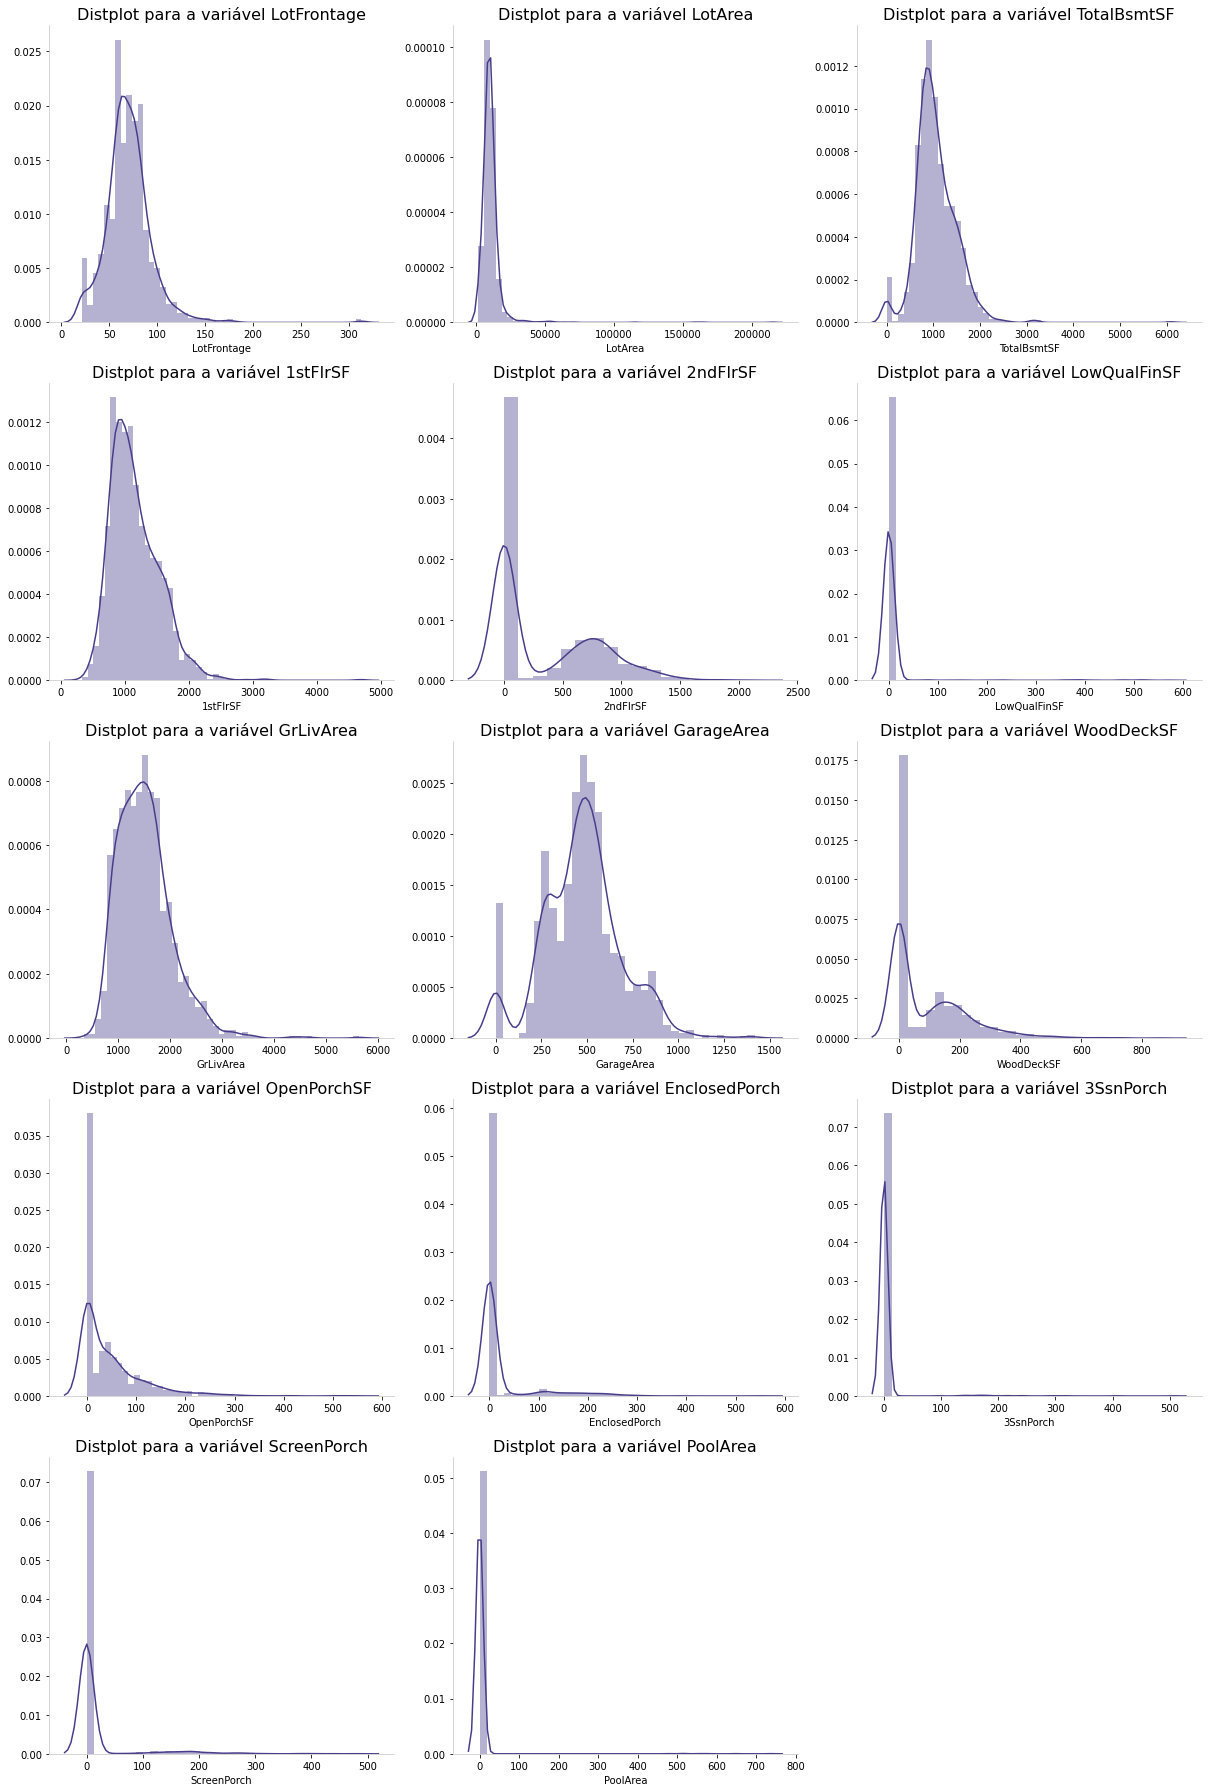

In [7]:
# Separando variáveis de espaço
space_cols = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 
              'BsmtQual', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 
              'GarageType', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 
              'LowQualFinSF', 'MoSold', 'OpenPorchSF', 'PoolArea', 'SaleCondition', 'SaleType',
              'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'YrSold']

# Variáveis numéricas de espaço com significado contínuo
num_space_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea']

# Variáveis numéricas de espaço com significado discreto
cat_space_cols = ['BsmtQual', 'GarageType', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                  'GarageCars', 'MoSold', 'YrSold']

# Plotando distribuição das variáveis contínuas de espaço e ambiente
plot_multiple_distplots(df=df, col_list=num_space_cols, kind='dist')

A figura de plotagem acima, gerada pela função `plot_multiple_distplot()` do módulo `pycomp.viz.insights`, consolida gráficos de distribuição para um set específico de variáveis contínuas dentro do contexto de "Espaço e Ambiente" dos imóveis. Nela, é possível visualizar como algumas features se comportam dentro do dataset proposto e, entre as conclusões possíveis, é possível pontuar:

* As variáveis `LotFrontage`, `TotalBsmtSF`, `1stFlrSF` e `GrLivArea` possuem distribuições que se assemelham a distribuição normal gaussiana, permitindo assim a retirada de conclusões visuais claras de parâmetros estatísticos específicos (como a média, desvio padrão, entre outros);
* Algumas outras variáveis, como por exemplo, `LowQualFnSF`, `EnclosedPorch`, `ScreenPorch` e `PoolArea` possuem distribuições semelhantes a variáveis discretas, contendo altos picos em valores 0 (ou próximo a 0).

Para complementar essa análise e adicionar uma visualização que permita analisar a relação de algumas variáveis com a variável target (`SalePrice`), é possível executar a função `plot_multiple_dist_scatterplot()`.

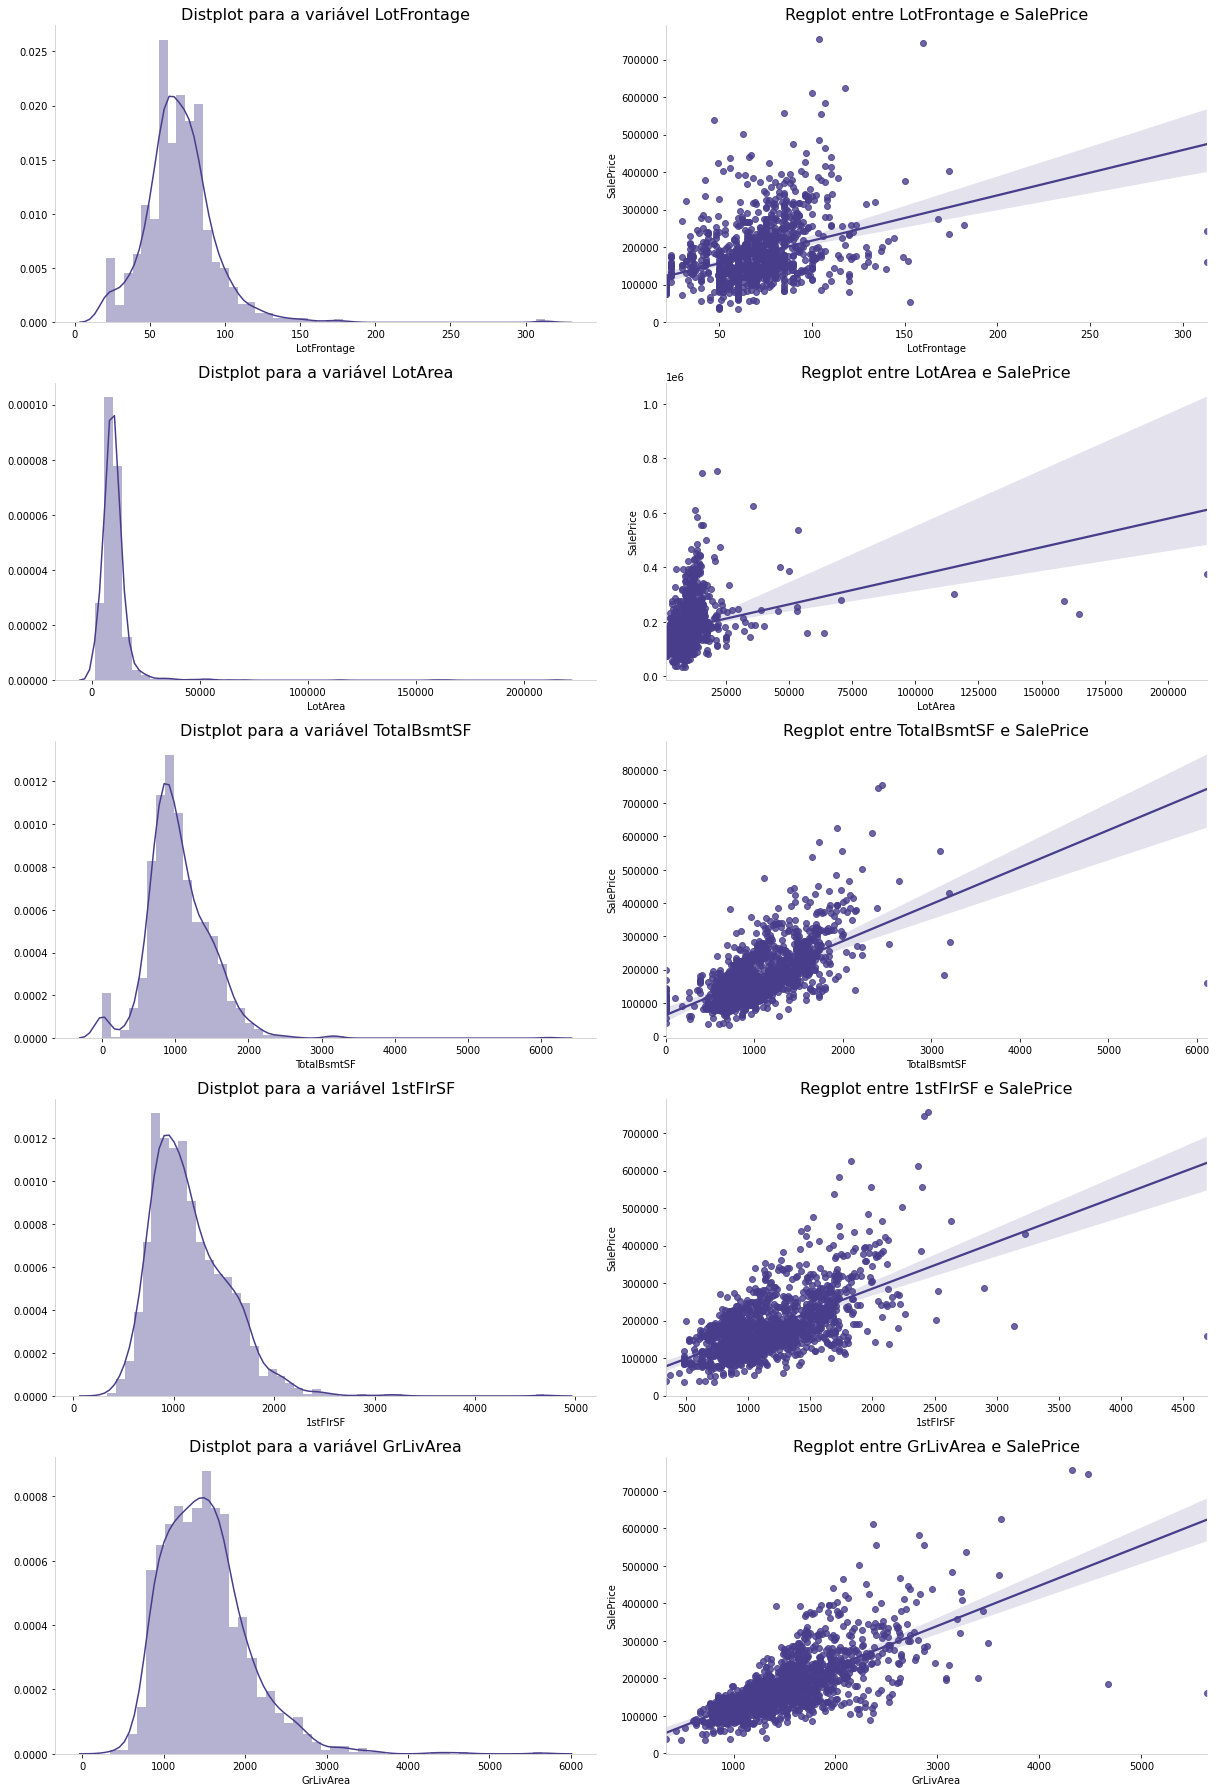

In [8]:
normal_dist_num_space_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
plot_multiple_dist_scatterplot(df=df, col_list=normal_dist_num_space_cols, y_col='SalePrice')

Através da análise da plotagem acima, é possível perceber algumas correlações interessantes entre as variáveis selecionadas e o respectivo preço do imóvel registrado. Em todos os casos observados, existe uma correlação positiva, indicando que a variável target e cada uma das variáveis acima selecionadas possuem uma relação diretamente proporcional. Na prática, essas variáveis indicam informações relacionadas a **área** de ambientes (lote, porão, terreno, garagem, entre outras), permitindo assim uma conclusão direta e genérica: "quanto maior o ambiente, mais caro o imóvel".

Essa visualização é de extrema importância pois, dado o comportamento acima observado, é possível afirmar que essas variáveis podem ter uma boa influência durante a fase de treinamento de um modelo preditivo. Uma outra forma de visualizar essa relação é a partir de uma matriz de correlação, ao qual será analisada futuramente, após a etapa de preparação dos dados.

In [9]:
def plot_multiple_countplots(df, col_list, n_cols=3,  **kwargs):
    """
    Função responsável por plotar um gráfico de barras de volumetrias (countplot)
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col_list: lista de colunas utilizadas na análise múltipla [type: list]
    :param n_cols: número de colunas configuradas na figura [type: int, default=3]
    :param **kwargs: parâmetros adicionais da função   
        :arg top: filtro de top categorias a serem plotadas [type: int, default=-1]
        :arg orient: horizontal ou vertical [type: string, default='h']
        :arg figsize: dimensões da figura de plotagem [type: tuple, default=(8, 8)]
        :arg label_names: labels personalizados para os rótulos [type: dict, default=value_counts().index]
        :arg order: flag para ordenação dos dados [type: bool, default=True]
        :arg hue: parâmetro hue para quebra de plotagem do método countplot [type: string, default=None]
        :arg palette: paleta de cores utilizada na plotagem [type: string, default='rainbow']
        :arg title: título do gráfico [type: string, default=f'Volumetria para a variável {col}']
        :arg size_title: tamanho do título [type: int, default=16]
        :arg size_label: tamanho do rótulo [type: int, default=14]
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_countplot.png']
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além de uma plotagem de volumetrias (barras)

    Aplicação
    ---------
    plot_multiple_countplots(df=df, col_list=total_cols)
    """
    
    # Definindo parâmetros da figura de plotagem
    n_rows = ceil(len(col_list) / n_cols)
    figsize = (17, n_rows * 5)
    i, j = 0, 0
    
    # Parâmetros de plotagem
    hue = kwargs['hue'] if 'hue' in kwargs else None
    palette = kwargs['palette'] if 'palette' in kwargs else 'rainbow'
    order = df[col].value_counts().index if 'order' in kwargs and bool(kwargs['order']) else None
    orient = kwargs['orient'] if 'orient' in kwargs and kwargs['orient'] in ['h', 'v'] else 'h'
    size_title = kwargs['size_title'] if 'size_title' in kwargs else 12
    size_labels = kwargs['size_labels'] if 'size_labels' in kwargs else 12
    
    # Criando figura e iterando sobre colunas da lista
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
    for col in col_list:
        ax = axs[i, j]
    
        # Retornando parâmetros de filtro de colunas
        top = kwargs['top'] if 'top' in kwargs else -1
        if top > 0:
            cat_count = df[col].value_counts()
            top_categories = cat_count[:top].index
            df = df[df[col].isin(top_categories)]

        # Definindo orientação
        if orient == 'v':
            x = None
            y = col
        else:
            x = col
            y = None

        # Executando countplot
        sns.countplot(data=df, ax=ax, x=x, y=y, hue=hue, order=order, palette=palette)

        # Formatando plotagem
        ax.set_title(f'Volumetria de Dados por {col}', size=size_title, pad=20)
        format_spines(ax, right_border=False)

        # Inserindo rótulo de percentual e modificando labels
        ncount = len(df)
        if x:
            # Rótulos
            for p in ax.patches:
                x = p.get_bbox().get_points()[:, 0]
                y = p.get_bbox().get_points()[1, 1]
                try:
                    ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), 
                                ha='center', va='bottom', size=size_labels)
                except ValueError as ve: # Erro por divisão por zero em entradas inexistentes pela quebra
                    continue
        else:
            # Rótulos
            for p in ax.patches:
                x = p.get_bbox().get_points()[1, 0]
                y = p.get_bbox().get_points()[:, 1]
                try:
                    ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), 
                                va='center', size=size_labels)
                except ValueError as ve: # Erro por divisão por zero em entradas inexistentes pela quebra
                    continue
                    
        # Incrementando índices
        j += 1
        if j == n_cols:
            j = 0
            i += 1
    
    plt.tight_layout()
    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'multiple_countplots.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)
        

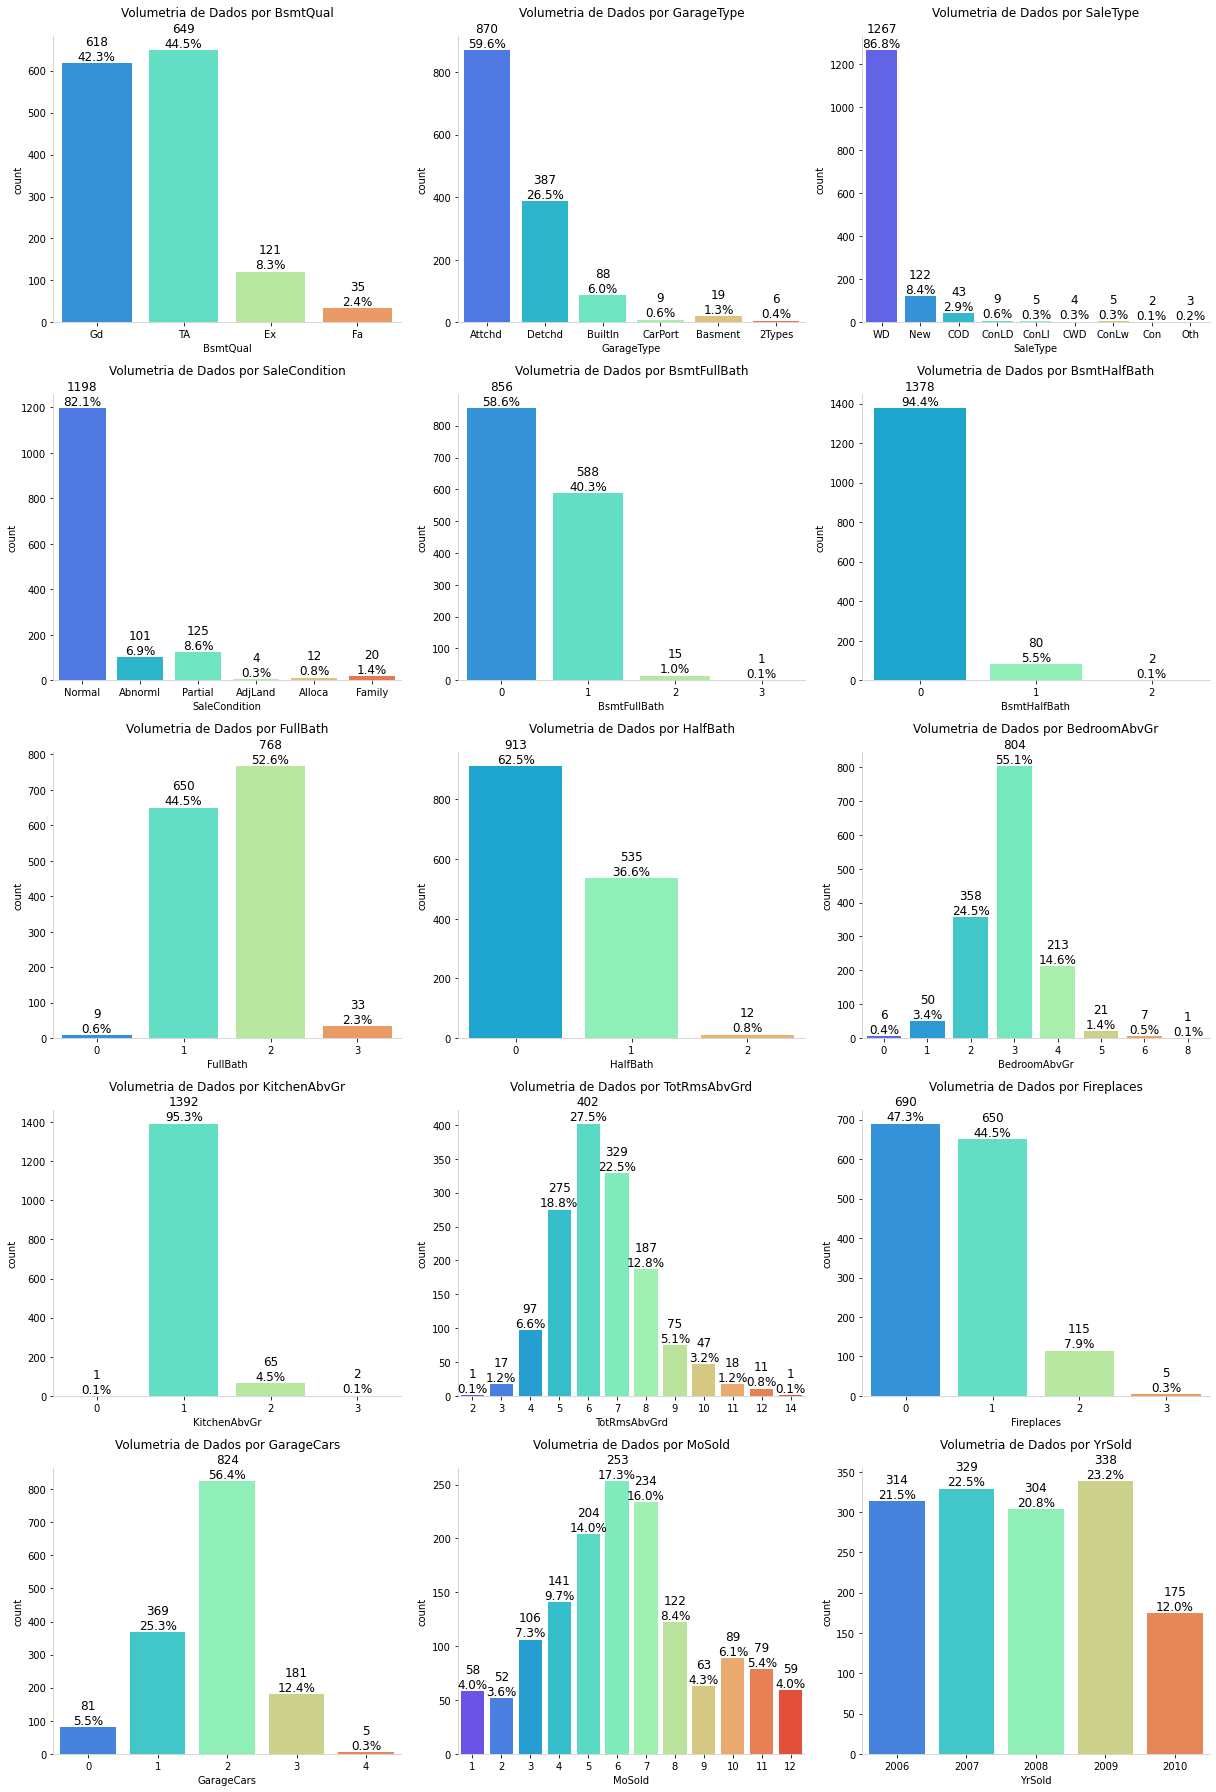

In [10]:
plot_multiple_countplots(df=df, col_list=cat_space_cols)

A figura de plotagem acima, gerada pela função `plot_multiple_countplots()` do módulo `pycomp.viz.insights`, traz um overview geral das volumetrias atreladas a cada uma das entradas de algumas variáveis de ambiente e espaço classificadas como categóricas. Apesar da grande quantidade de visões atreladas, é possível extrair alguns insights relevantes, como por exemplo:

* Existe uma tendência histórica maior de vendas nos meses 5, 6 e 7 que pode ser visualizada na plotagem de volumetria para a variável `MoSold`;
* A maioria dos imóveis presentes na base possuem garagem para 2 carros, fato que pode ser constatado pela plotagem por `GarageCars`;
* A maioria das casa não possuem lareira, porém uma parcela relevante possui pelo menos 1 lareira (análise por `Fireplaces`.

Semelhante ao realizado acima com a função `plot_multiple_dist_scatterplot()`, a visão abaixo tem por objetivo analisar graficamente os dados de algumas variáveis e relacioná-los a uma variável target, extraindo indicadores estastísticos como média, mediana, desvio padrão, entre outros.

In [46]:
def plot_cat_aggreg_report(df, cat_col, value_col, main_aggreg='mean', **kwargs):
    
    # Validando presença das colunas na base
    if cat_col not in df.columns:
        print(f'Coluna "cat_col" não presente na base')
        return
    elif value_col not in df.columns:
        print(f'Coluna "value_col" não presente na base')
    
    # Extraindo parâmetros adicionais da função
    figsize = kwargs['figsize'] if 'figsize' in kwargs else (17, 5)
    palette = kwargs['palette'] if 'palette' in kwargs else 'rainbow'
    title1 = kwargs['title1'] if 'title1' in kwargs else f'Volumetria por {cat_col}'
    size_titles = kwargs['size_titles'] if 'size_titles' in kwargs else 14
    size_labels = kwargs['size_labels'] if 'size_labels' in kwargs else 10
    
    # Orientação da plotagem
    orient = kwargs['orient'] if 'orient' in kwargs and kwargs['orient'] in ['h', 'v'] else 'h'
    if orient == 'h':
        x = cat_col
        y = None
    else:
        x = None
        y = cat_col
    
    # Construindo figura de plotgem para análise
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    
    # Gráfico 01 - countplot para cat_col
    sns.countplot(x=x, y=y, data=df, ax=ax[0], palette=palette, orient=orient)
    format_spines(ax[0], right_border=False)
    ax[0].set_title(title1, size=size_titles, pad=20)
    
    # Inserindo rótulo de percentual
    ncount = len(df)
    if x:
        # Rótulos
        for p in ax[0].patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            try:
                ax[0].annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), 
                            ha='center', va='bottom', size=size_labels)
            except ValueError as ve: # Erro por divisão por zero em entradas inexistentes pela quebra
                continue
    else:
        # Rótulos
        for p in ax[0].patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            try:
                ax[0].annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), 
                            va='center', size=size_labels)
            except ValueError as ve: # Erro por divisão por zero em entradas inexistentes pela quebra
                continue
    
    # Gráfico 02 - aggregation plot para cat_col e value_col
    
    
    plt.tight_layout()

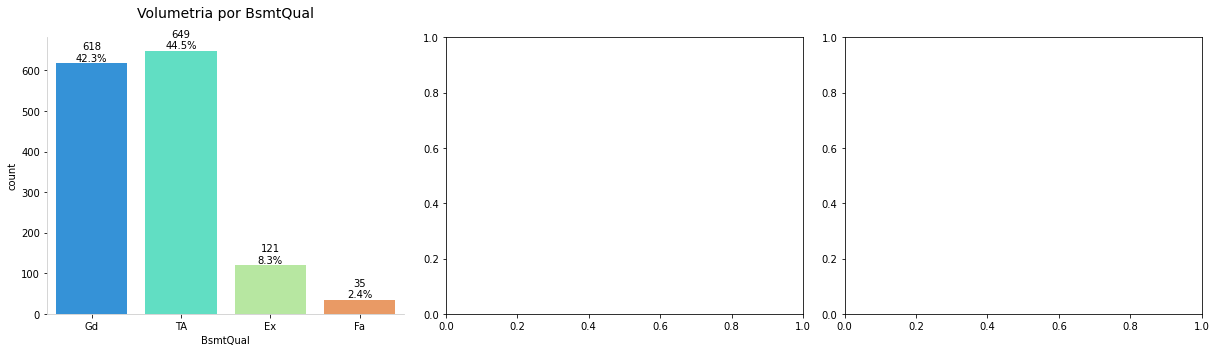

In [47]:
plot_cat_aggreg_report(df=df, cat_col='BsmtQual', value_col='SalePrice')

IDEIA: usar o df.describe() para coletar parâmetros estatísticos

In [48]:
def plot_countplot(df, col, **kwargs):
    """
    Função responsável por plotar um gráfico de barras de volumetrias (countplot)
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col: referência de coluna a ser plotada [type: string]
    :param **kwargs: parâmetros adicionais da função   
        :arg top: filtro de top categorias a serem plotadas [type: int, default=-1]
        :arg orient: horizontal ou vertical [type: string, default='h']
        :arg figsize: dimensões da figura de plotagem [type: tuple, default=(8, 8)]
        :arg label_names: labels personalizados para os rótulos [type: dict, default=value_counts().index]
        :arg order: flag para ordenação dos dados [type: bool, default=True]
        :arg hue: parâmetro hue para quebra de plotagem do método countplot [type: string, default=None]
        :arg palette: paleta de cores utilizada na plotagem [type: string, default='rainbow']
        :arg title: título do gráfico [type: string, default=f'Volumetria para a variável {col}']
        :arg size_title: tamanho do título [type: int, default=16]
        :arg size_label: tamanho do rótulo [type: int, default=14]
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_countplot.png']
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além de uma plotagem de volumetrias (barras)

    Aplicação
    ---------
    plot_countplot(df=df, col='column')
    """
    
    # Validando presença da coluna na base
    if col not in df.columns:
        print(f'Coluna {col} não presente na base')
        return
    
    # Retornando parâmetros de filtro de colunas
    top = kwargs['top'] if 'top' in kwargs else -1
    if top > 0:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]
        
    # Parâmetros de plotagem
    figsize = kwargs['figsize'] if 'figsize' in kwargs else (10, 7)
    hue = kwargs['hue'] if 'hue' in kwargs else None
    palette = kwargs['palette'] if 'palette' in kwargs else 'rainbow'
    order = df[col].value_counts().index if 'order' in kwargs and bool(kwargs['order']) else None
    orient = kwargs['orient'] if 'orient' in kwargs and kwargs['orient'] in ['h', 'v'] else 'h'
    ax = kwargs['ax'] if 'ax' in kwargs else None
        
    # Definindo orientação
    if orient == 'v':
        x = None
        y = col
    else:
        x = col
        y = None
    
    # Criando figura e aplicando countplot
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=df, ax=ax, x=x, y=y, hue=hue, order=order, palette=palette)

    # Retornando parâmetros de formatação da plotagem
    title = kwargs['title'] if 'title' in kwargs else f'Volumetria de Dados por {col}'
    size_title = kwargs['size_title'] if 'size_title' in kwargs else 16
    size_labels = kwargs['size_labels'] if 'size_labels' in kwargs else 14
    label_names = kwargs['label_names'] if 'label_names' in kwargs else None
    
    # Formatando plotagem
    ax.set_title(title, size=size_title, pad=20)
    format_spines(ax, right_border=False)

    # Inserindo rótulo de percentual e modificando labels
    ncount = len(df)
    if x:
        # Rótulos
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            try:
                ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), 
                            ha='center', va='bottom', size=size_labels)
            except ValueError as ve: # Erro por divisão por zero em entradas inexistentes pela quebra
                continue
        
        # Labels
        if 'label_names' in kwargs:
            labels_old = ax.get_xticklabels()
            labels = [l.get_text() for l in labels_old]
            try:
                # Convertendo textos antes do mapeamento
                if type(list(kwargs['label_names'].keys())[0]) is int:
                    labels = [int(l) for l in labels]
                elif type(list(kwargs['label_names'].keys())[0]) is float:
                    labels = [float(l) for l in labels]
                
                # Mapeando rótulos customizados
                labels = pd.DataFrame(labels)[0].map(kwargs['label_names'])
                ax.set_xticklabels(labels)
            except Exception as e:
                print(f'Erro ao mapear labels na coluna {col}. Exception: {e}')
    else:
        # Rótulos
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            try:
                ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), 
                            va='center', size=size_labels)
            except ValueError as ve: # Erro por divisão por zero em entradas inexistentes pela quebra
                continue

        # Labels
        if 'label_names' in kwargs:
            labels_old = ax.get_yticklabels()
            labels = [l.get_text() for l in labels_old]
            try:
                # Convertendo textos antes do mapeamento
                if type(list(kwargs['label_names'].keys())[0]) is int:
                    labels = [int(l) for l in labels]
                elif type(list(kwargs['label_names'].keys())[0]) is float:
                    labels = [float(l) for l in labels]
                
                # Mapeando rótulos customizados
                labels = pd.DataFrame(labels)[0].map(kwargs['label_names'])
                ax.set_yticklabels(labels)
            except Exception as e:
                print(f'Erro ao mapear labels na coluna {col}. Exception: {e}')

    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'{col}_countplot.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)


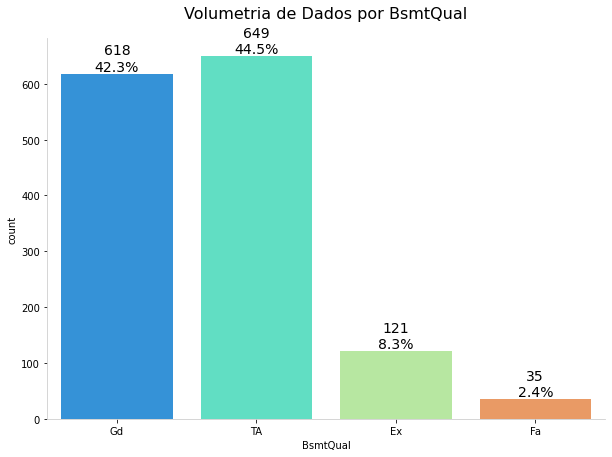

In [49]:
plot_countplot(df=df, col='BsmtQual')

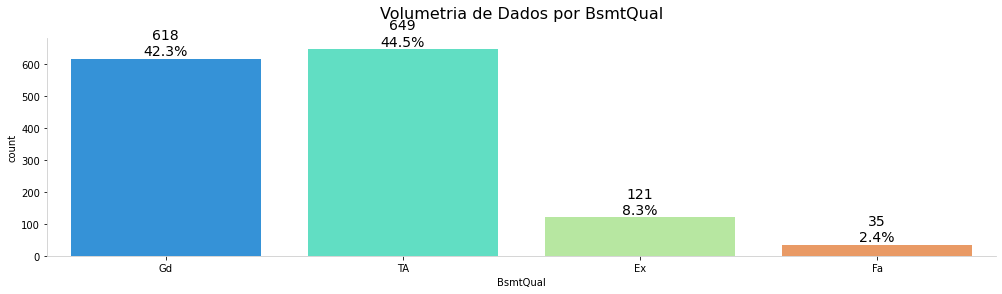

In [51]:
fig, ax = plt.subplots(figsize=(17, 4))
plot_countplot(df=df, col='BsmtQual', ax=ax)

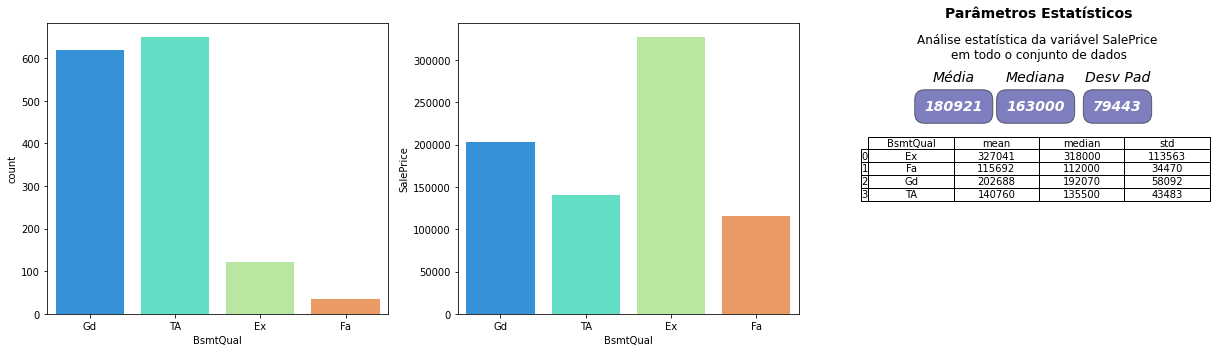

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
col = cat_space_cols[0]
col2 = 'SalePrice'
sns.countplot(x=col, data=df, ax=ax[0], palette='rainbow')

# Agregando parâmetros
df_agrup = df.groupby(by=col, as_index=False).mean().loc[:, [col, col2]]
order_labels = [item.get_text() for item in ax[0].get_xticklabels()]
sns.barplot(data=df_agrup, x=col, y=col2, ax=ax[1], palette='rainbow', order=order_labels)

# Plotando tabela
ax[2].axis('off')
"""df_agrup.index = df_agrup[col]
df_agrup.drop(col, axis=1, inplace=True)"""
df_agrup = df.groupby(by=col, as_index=False).agg(mean=(col2, 'mean'), median=(col2, 'median'), 
                                                  std=(col2, 'std'))
df_agrup['mean'] = df_agrup['mean'].apply(lambda x: int(round(x, 0)))
df_agrup['std'] = df_agrup['std'].apply(lambda x: int(round(x, 0)))
ax[2].table(cellText=df_agrup.values, 
            rowLabels=df_agrup.index, 
            colLabels=df_agrup.columns,
            cellLoc='center', rowLoc='center',
            loc='center')


# Parâmetros estatísticos
mean_col2 = int(round(df[col2].mean(), 0))
median_col2 = int(round(df[col2].median(), 0))
std_col2 = int(round(df[col2].std(), 0))

len_mean_col2 = len(str(mean_col2))
len_median_col2 = len(str(median_col2))
x_pos = 0.25
y_pos = 0.70
text_x_pos= 0.25
text_y_pos = y_pos + 0.10
desc_text_x_pos = 0.50
desc_text_y_pos = 0.88

ax[2].text(desc_text_x_pos, desc_text_y_pos, f'Análise estatística da variável {col2} \nem todo o conjunto de dados',
           fontsize=12, ha='center', color='black')

ax[2].text(text_x_pos, text_y_pos, 'Média', fontsize=14, ha='center', color='black', 
           style='italic')

text_x_pos += len_mean_col2/25
ax[2].text(text_x_pos, text_y_pos, 'Mediana', fontsize=14, ha='center', color='black', 
           style='italic')

text_x_pos += len_median_col2/25
ax[2].text(text_x_pos, text_y_pos, 'Desv Pad', fontsize=14, ha='center', color='black', 
           style='italic')

ax[2].text(x_pos, y_pos, mean_col2, fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))

x_pos += len_mean_col2/25
ax[2].text(x_pos, y_pos, median_col2, fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))

x_pos += len_median_col2/25
ax[2].text(x_pos, y_pos, std_col2, fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))

ax[2].set_title('Parâmetros Estatísticos', size=14, weight='bold')
plt.tight_layout()

TODO:

Verificar notebook Brazilian E Commerce para plotar e configurar média, mediana e desvio padrão da base inteira (SalePrice) para posicionar acima da tabela

In [ ]:
df_group = df.groupby(by=col, as_index=False).agg({col2: ['mean', 'median', 'min', 'max']})
df_group

In [ ]:
df_agrup = df.groupby(by=col, as_index=False).agg(mean=(col2, 'mean'), median=(col2, 'median'))
df_agrup

In [ ]:
df_agrup

In [ ]:
order_labels = [item.get_text() for item in ax[0].get_xticklabels()]

In [ ]:
labels

In [ ]:
ax[2].table